In [1]:
import numpy as np
import pandas as pd

import networkx as nx

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import clustergraph.clustergraph as cg
from clustergraph.utils import get_clusters_from_scikit
import clustergraph.plot_graph as pg
import pandas as pd
import os

file_path = "data/GSM3618024_gene_count_RPI6.csv"
df = pd.read_csv(file_path,sep=",")  # Use sep="," if it's CSV

print(df.head())  # Show first few rows
print(df.shape)

X = df.iloc[:, 1:].to_numpy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(0.92)
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)

           gene_id  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  P15  P16  P17   
0  ENSG00000250007   0   0   0   0   0   0   0   0   0  ...    0    0    0  \
1  ENSG00000241114   0   0   0   0   0   0   0   0   0  ...    0    0    0   
2  ENSG00000258744   0   0   0   0   0   0   0   0   0  ...    0    0    0   
3  ENSG00000266201   0   0   0   0   0   0   0   0   0  ...    0    0    0   
4  ENSG00000268366   0   0   0   0   0   0   0   0   0  ...    0    0    0   

   P18  P19  P20  P21  P22  P23  P24  
0    0    0    0    0    1    0    0  
1    0    0    0    0    1    0    0  
2    0    0    0    0    1    0    0  
3    0    0    0    0    1    0    0  
4    0    0    0    0    1    0    0  

[5 rows x 384 columns]
(26495, 384)
(26495, 34)


In [2]:
import numpy as np
from collections import Counter

model = KMeans(20, random_state=42)
pred = model.fit_predict(X_pca)

# Count number of points in each cluster
cluster_counts = Counter(pred)

# Convert to a sorted dictionary (optional)
cluster_counts_sorted = dict(sorted(cluster_counts.items()))

# Print results
for cluster, count in cluster_counts_sorted.items():
    print(f"Cluster {cluster}: {count} points")

# We keep only clusters with more than 50 points covered
clusters_to_keep = {cluster for cluster, count in cluster_counts_sorted.items() if count > 3000}


# Get boolean mask for selected clusters
mask = np.isin(pred, list(clusters_to_keep))

# Filter X_pca based on the mask
X_filtered = X_pca[mask]

C:\Users\mathi\anaconda3\envs\tda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 3832 points
Cluster 1: 1 points
Cluster 2: 55 points
Cluster 3: 2 points
Cluster 4: 1 points
Cluster 5: 271 points
Cluster 6: 3 points
Cluster 7: 21268 points
Cluster 8: 4 points
Cluster 9: 123 points
Cluster 10: 13 points
Cluster 11: 1 points
Cluster 12: 5 points
Cluster 13: 1 points
Cluster 14: 4 points
Cluster 15: 1 points
Cluster 16: 9 points
Cluster 17: 5 points
Cluster 18: 1 points
Cluster 19: 895 points


In [3]:
print(X_filtered.shape)

model = KMeans(20, random_state=42)
pred_filtered = model.fit_predict(X_filtered)

# Count number of points in each cluster
cluster_counts_filtered = Counter(pred_filtered)

# Convert to a sorted dictionary (optional)
cluster_counts_sorted_filtered = dict(sorted(cluster_counts_filtered.items()))

# Print results
for cluster, count in cluster_counts_sorted_filtered.items():
    print(f"Cluster {cluster}: {count} points")

(25100, 34)


C:\Users\mathi\anaconda3\envs\tda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 16790 points
Cluster 1: 2270 points
Cluster 2: 1 points
Cluster 3: 633 points
Cluster 4: 4392 points
Cluster 5: 5 points
Cluster 6: 33 points
Cluster 7: 25 points
Cluster 8: 4 points
Cluster 9: 3 points
Cluster 10: 22 points
Cluster 11: 32 points
Cluster 12: 10 points
Cluster 13: 53 points
Cluster 14: 34 points
Cluster 15: 19 points
Cluster 16: 77 points
Cluster 17: 592 points
Cluster 18: 83 points
Cluster 19: 22 points


In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=14, random_state=42)
gmm_labels = gmm.fit_predict(X_filtered)

# Count number of points in each cluster
cluster_counts_filtered = Counter(gmm_labels)

# Convert to a sorted dictionary (optional)
cluster_counts_sorted_filtered = dict(sorted(cluster_counts_filtered.items()))

# Print results
for cluster, count in cluster_counts_sorted_filtered.items():
    print(f"Cluster {cluster}: {count} points")

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=15)
agglo_labels = agglo.fit_predict(X_filtered)

# Count number of points in each cluster
cluster_counts_filtered = Counter(agglo_labels)

# Convert to a sorted dictionary (optional)
cluster_counts_sorted_filtered = dict(sorted(cluster_counts_filtered.items()))

# Print results
for cluster, count in cluster_counts_sorted_filtered.items():
    print(f"Cluster {cluster}: {count} points")

In [4]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=10, random_state=42, affinity='nearest_neighbors', n_neighbors=1000)
spectral_labels = spectral.fit_predict(X_filtered)

# Count number of points in each cluster
cluster_counts_filtered = Counter(spectral_labels)

# Convert to a sorted dictionary (optional)
cluster_counts_sorted_filtered = dict(sorted(cluster_counts_filtered.items()))

# Print results
for cluster, count in cluster_counts_sorted_filtered.items():
    print(f"Cluster {cluster}: {count} points")

Cluster 0: 3730 points
Cluster 1: 3377 points
Cluster 2: 1955 points
Cluster 3: 3073 points
Cluster 4: 1734 points
Cluster 5: 3374 points
Cluster 6: 2226 points
Cluster 7: 2319 points
Cluster 8: 1747 points
Cluster 9: 1565 points


# ClusterGraph

Execution Time: 3868.16 seconds


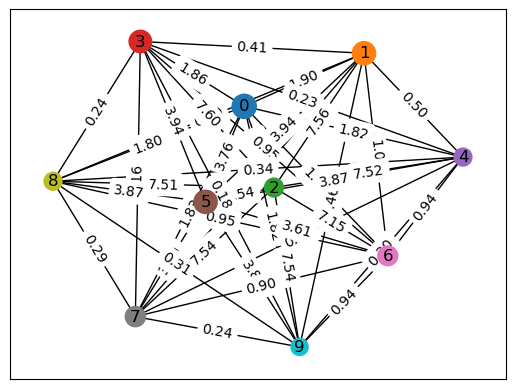

In [5]:
import time
start_time = time.time()

cluster_g = cg.ClusterGraph(
    clusters=get_clusters_from_scikit(spectral_labels), X=X_filtered, metric_clusters="average"
)

# Coloring the graph
cluster_g.color_graph(
    node_color_labels=spectral_labels,
    node_palette=cm.get_cmap("tab20"),
)
end_time = time.time()
print(f"Execution Time: {end_time - start_time:.2f} seconds")
pg.draw_graph(cluster_g.Graph, size_nodes=1000, random_state=42)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

tab20_colors = sns.color_palette("tab20", n_colors=15)
# Map each cluster label to its corresponding color (in hexadecimal format)
label_colors = [tab20_colors[label] for label in spectral_labels]
hex_colors = [matplotlib.colors.to_hex(color) for color in label_colors]
hex_colors = np.array(hex_colors)

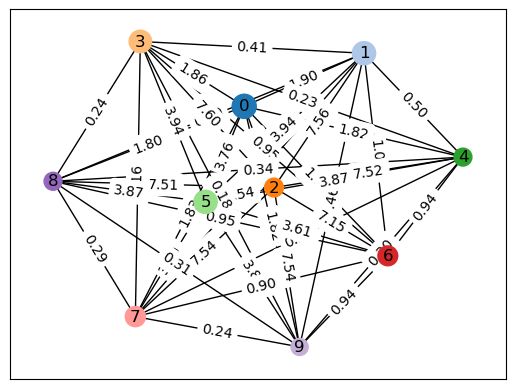

In [7]:
# Coloring the graph
cluster_g.color_graph(
    node_color_labels=hex_colors,
    node_palette=cm.get_cmap("tab20"),
)

pg.draw_graph(cluster_g.Graph, size_nodes=1000, random_state=42)

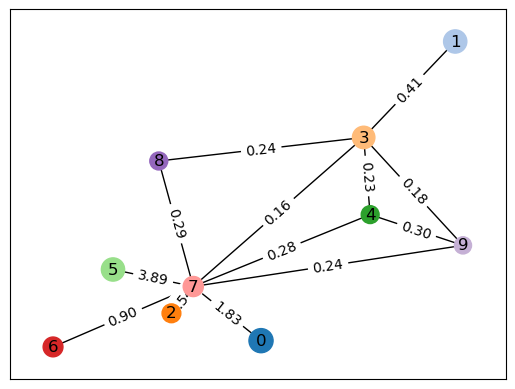

In [43]:
connectivity_graph, conn = cluster_g.prune_conn(score=True)

connectivity_graph = cluster_g.prune_conn(nb_edge_pruned=32)
pg.draw_graph(connectivity_graph, size_nodes=1000, random_state=42)

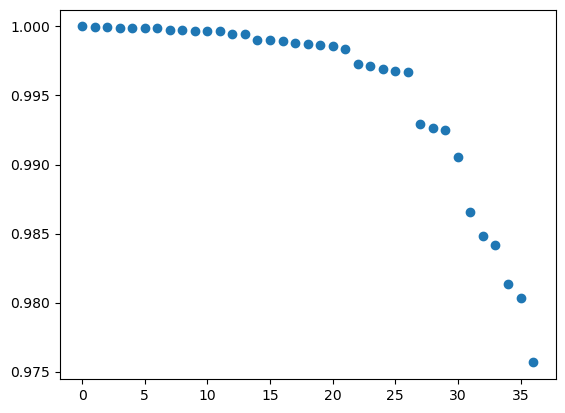

In [9]:
plt.scatter( list(range(len(conn))), conn  )

In [10]:
import umap as um
import matplotlib.pyplot as plt
import seaborn as sns
import phate
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_filtered)

# Fit UMAP
uma = um.UMAP(n_neighbors=15, random_state=42)
X_umap = uma.fit_transform(X_filtered)

# Fit PHATE
phate_operator = phate.PHATE(n_jobs=-2)
X_phate = phate_operator.fit_transform(X_filtered)


# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Fit PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

Calculating PHATE...
  Running PHATE on 25100 observations and 34 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 14.58 seconds.
    Calculating affinities...


C:\Users\mathi\AppData\Roaming\Python\Python310\site-packages\graphtools\graphs.py:290: RuntimeWarning: Detected zero distance between 28638 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
C:\Users\mathi\AppData\Roaming\Python\Python310\site-packages\graphtools\graphs.py:454: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


    Calculated affinities in 1.32 seconds.
  Calculated graph and diffusion operator in 16.04 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.04 seconds.
    Calculating KMeans...
    Calculated KMeans in 5.70 seconds.
  Calculated landmark operator in 12.92 seconds.
  Calculating optimal t...
    Automatically selected t = 5
  Calculated optimal t in 2.55 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.93 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.51 seconds.
Calculated PHATE in 40.96 seconds.


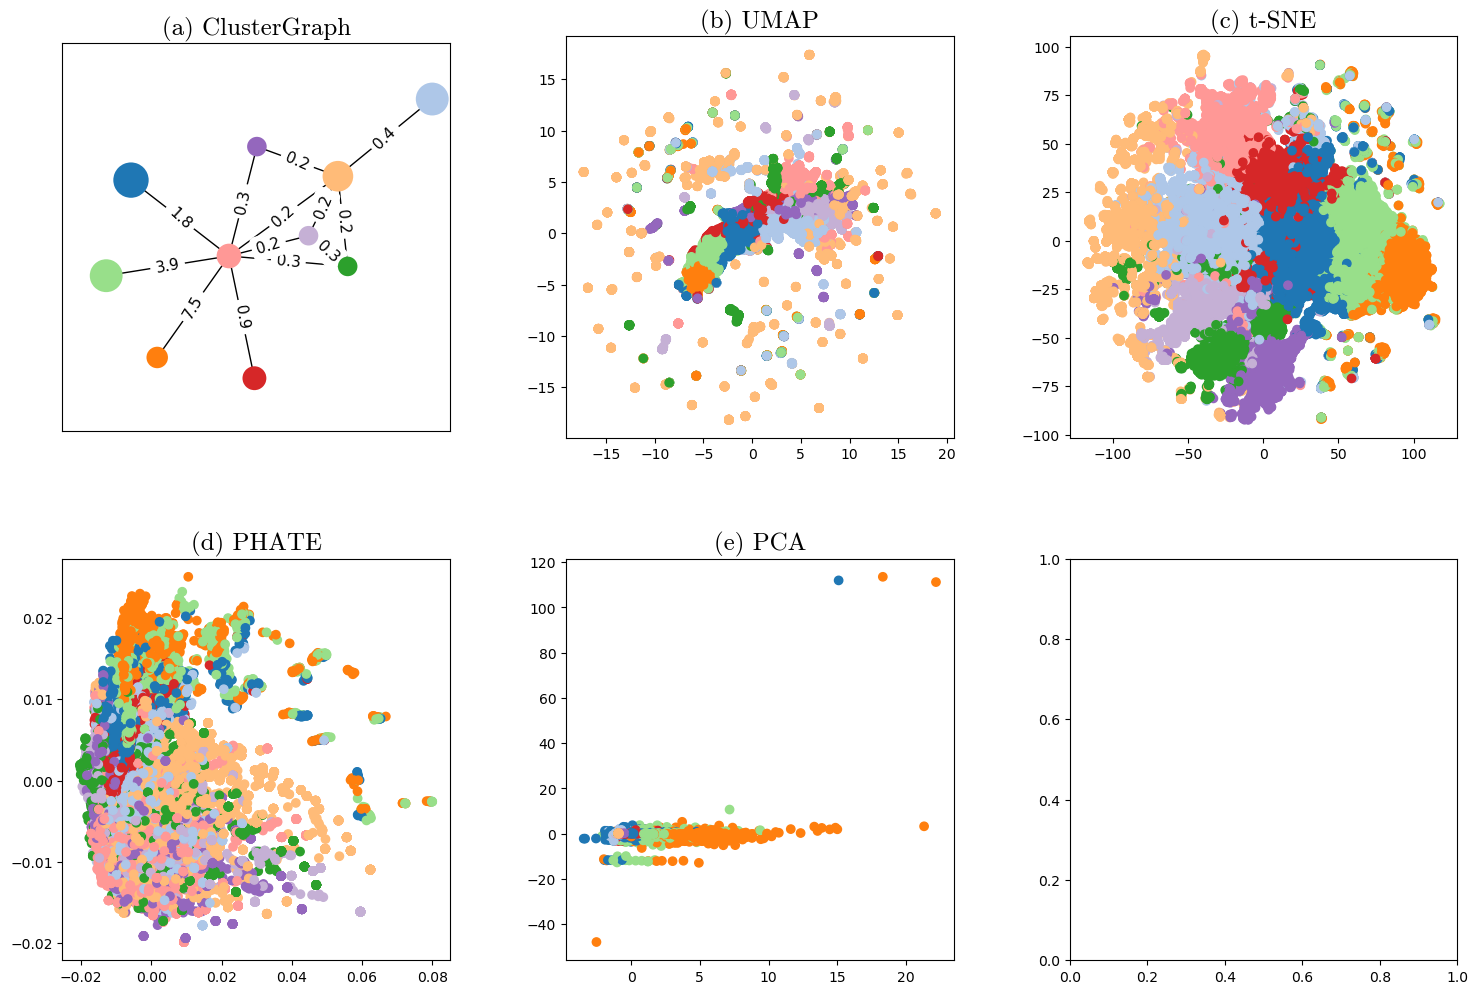

In [47]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# --- Network Graph ---
pos = nx.spring_layout(
    connectivity_graph, seed=42, iterations=100, scale=0.9, center=(0, 0), weight="spring"
)

# Draw edges first
nx.draw_networkx_edges(connectivity_graph, pos=pos, ax=axs[0, 0])

# Draw edge labels
edge_labels = {
    (u, v): "{:.1f}".format(data["weight_plot"])
    for u, v, data in connectivity_graph.edges(data=True)
}
nx.draw_networkx_edge_labels(
    connectivity_graph,
    pos,
    edge_labels=edge_labels,
    font_color="black",
    font_size=11,
    ax=axs[0, 0],
)

# Draw nodes as pie charts
for node, data in connectivity_graph.nodes(data=True):
    attributes = connectivity_graph.nodes[node]["data_perc_labels"]
    keys = list(attributes)
    attrs = [attributes[k] for k in keys]

    axs[0, 0].pie(
        attrs,
        center=pos[node],
        colors=[k for k in keys],
        radius=max(data["size_plot"] * 0.3, 0.05),
        frame=True,
    )

# Ensure axis respects limits
axs[0, 0].set_xlim(*axs[0, 0].get_xlim())
axs[0, 0].set_ylim(*axs[0, 0].get_ylim())
axs[0, 0].set_xlim(-0.99, 0.99)  # Expand x limits
axs[0, 0].set_ylim(-0.99, 0.99)
axs[0, 0].set_aspect("equal")
axs[0, 0].set_title("(a) ClusterGraph", fontname="serif", family="cmr10", size=18)

# --- Other Projections ---
axs[0, 1].scatter(X_umap[:, 0], X_umap[:, 1], c=hex_colors)
axs[0, 1].set_title("(b) UMAP", fontname="serif", family="cmr10", size=18)

axs[0, 2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=hex_colors)
axs[0, 2].set_title("(c) t-SNE", fontname="serif", family="cmr10", size=18)

axs[1, 0].scatter(X_phate[:, 0], X_phate[:, 1], c=hex_colors)
axs[1, 0].set_title("(d) PHATE", fontname="serif", family="cmr10", size=18)

axs[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=hex_colors)
axs[1, 1].set_title("(e) PCA", fontname="serif", family="cmr10", size=18)

# --- Adjust Layout ---
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig("SpectralC_10clusters_RPI6.pdf")
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 12))

pos = nx.spring_layout(
    connectivity_graph, seed=42, iterations=100, scale=1, center=(0, 0), weight="spring"
)

nx.draw_networkx_edges(connectivity_graph, pos=pos, ax=axs[0, 0])

edge_labels = {
    (u, v): "{:.1f}".format(data["weight_plot"])
    for u, v, data in connectivity_graph.edges(data=True)
}
nx.draw_networkx_edge_labels(
    connectivity_graph,
    pos,
    edge_labels=edge_labels,
    font_color="black",
    font_size=9,
    ax=axs[0, 0],
)

xlim = axs[0, 0].get_xlim()
ylim = axs[0, 0].get_ylim()

for node, data in connectivity_graph.nodes(data=True):

    attributes = connectivity_graph.nodes[node]["data_perc_labels"]
    keys = list(attributes)
    attrs = [attributes[k] for k in keys]

    axs[0, 0].pie(
        attrs,
        center=pos[node],
        colors=[k for k in keys],
        radius=max(data["size_plot"] * 0.3, 0.05),
        frame=True,
    )


#axs[0, 0].legend(handles=patches, loc="upper left")

axs[0, 0].set_aspect("auto")
xlim = (xlim[0] * 0.9, xlim[1] * 0.9)
axs[0, 0].set_xlim(xlim)
axs[0, 0].set_ylim((-(xlim[1] - xlim[0]) / 2, (xlim[1] - xlim[0]) / 2))


axs[0, 0].set_title("(a) ClusterGraph", fontname="serif", family="cmr10", size=18)

axs[0, 1].scatter(X_umap[:, 0], X_umap[:, 1], c=hex_colors)
axs[0, 1].set_title("(b) UMAP", fontname="serif", family="cmr10", size=18)

axs[0, 2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=hex_colors)
axs[0, 2].set_title("(c) t-SNE", fontname="serif", family="cmr10", size=18)

axs[1, 0].scatter(X_phate[:, 0], X_phate[:, 1], c=hex_colors)
axs[1, 0].set_title("(d) PHATE", fontname="serif", family="cmr10", size=18)

axs[1, 2].scatter(X_pca[:, 0], X_pca[:, 1], c=hex_colors)
axs[1, 2].set_title("(e) PCA", fontname="serif", family="cmr10", size=18)


plt.tight_layout()
#plt.savefig("mice.pdf")
plt.show()